# **NAME: NIKHIL VIVIAN KERKETTA**

# TASK #1: Prediction using Supervised ML

In [8]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [10]:
df=pd.read_csv('scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


### Dataset contains total of 25 records for both hours and scores.

# Descriptive Statistics

In [12]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Exploratory Data Analysis

## Checking null NaN and Duplicated Values

In [13]:

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [14]:

df.duplicated().sum()

0

### Dataset does not contain any NaN and Duplicated Values

# Scores

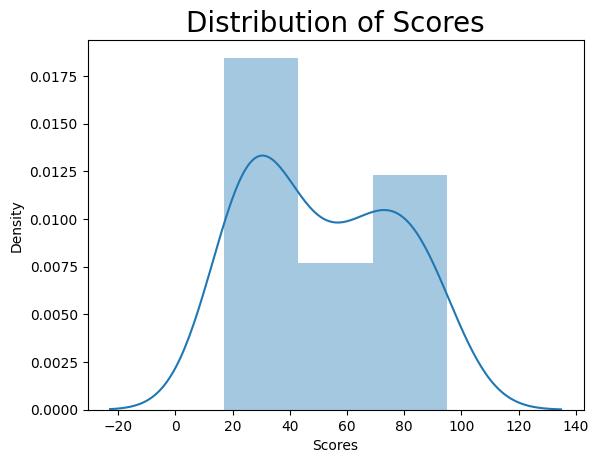

In [16]:
sns.distplot(df['Scores'])
plt.title('Distribution of Scores',size=20)
plt.show()

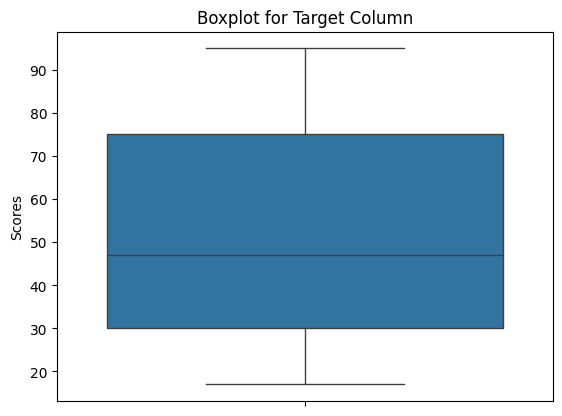

In [17]:
sns.boxplot(df['Scores'])
plt.title('Boxplot for Target Column')
plt.ylabel('Scores')
plt.show()

Grading to be done based on the criteria given below:

Score >= 75 ------> A Grade

75 > Scores >= 60 -----> B Grade

60 > Scores >= 35 -----> C Grade

In [18]:
def getgrade(mark):
    if mark>=75:
        return "A"
    elif mark>=60 and mark<75:
        return "B"
    elif mark>=35 and mark<60:
        return "C"
    else:
        return "D"

In [19]:
df["Grade"]=df["Scores"].apply(getgrade)

In [20]:
df.head

<bound method NDFrame.head of     Hours  Scores Grade
0     2.5      21     D
1     5.1      47     C
2     3.2      27     D
3     8.5      75     A
4     3.5      30     D
5     1.5      20     D
6     9.2      88     A
7     5.5      60     B
8     8.3      81     A
9     2.7      25     D
10    7.7      85     A
11    5.9      62     B
12    4.5      41     C
13    3.3      42     C
14    1.1      17     D
15    8.9      95     A
16    2.5      30     D
17    1.9      24     D
18    6.1      67     B
19    7.4      69     B
20    2.7      30     D
21    4.8      54     C
22    3.8      35     C
23    6.9      76     A
24    7.8      86     A>

<Axes: ylabel='count'>

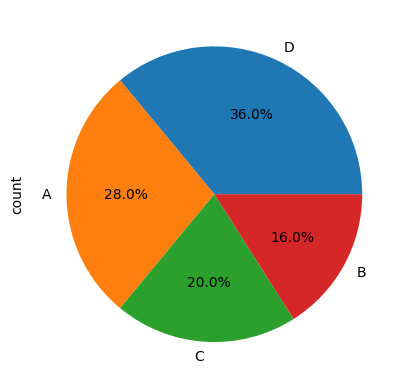

In [21]:
df["Grade"].value_counts().plot(kind="pie",autopct="%1.1f%%")

<Axes: xlabel='Grade', ylabel='count'>

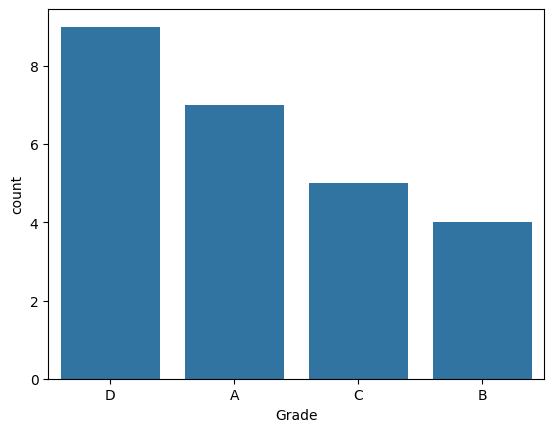

In [22]:

sns.countplot(x=df['Grade'],order=df['Grade'].value_counts().index)

## Hours Study

In [23]:
df['Hours'].describe()

count    25.000000
mean      5.012000
std       2.525094
min       1.100000
25%       2.700000
50%       4.800000
75%       7.400000
max       9.200000
Name: Hours, dtype: float64

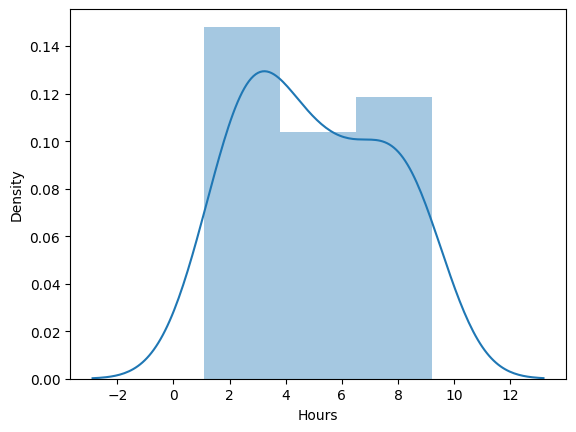

In [25]:
sns.distplot(df['Hours'])
plt.show()

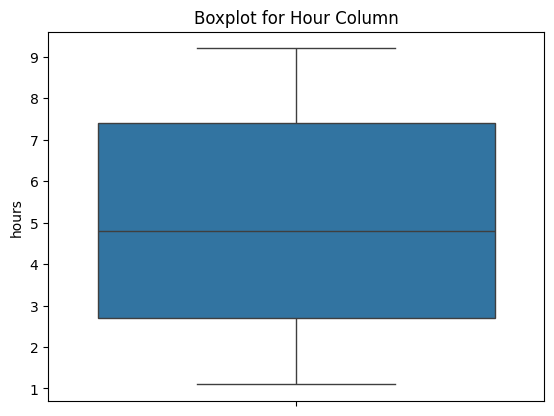

In [26]:
sns.boxplot(df['Hours'])
plt.title('Boxplot for Hour Column')
plt.ylabel('hours')
plt.show()

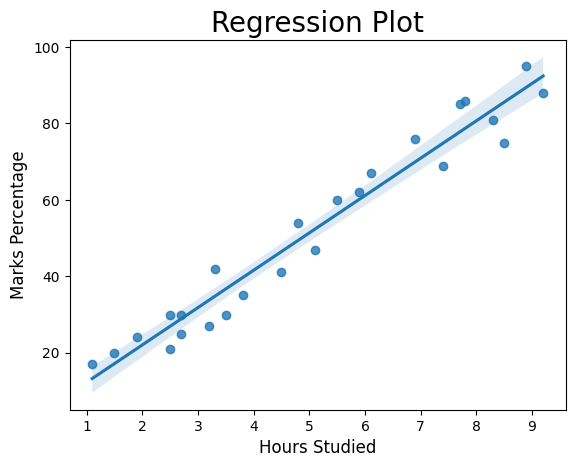

In [27]:
sns.regplot(x= df['Hours'], y= df['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [34]:

X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [38]:
x=df.iloc[:,:-2]
y=df['Scores']

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [42]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42) 

## Model Building
LinearRegression Model-- Baseline Model
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [44]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

Model Prediction


In [63]:
print(x_test) # Testing data - In Hours
ypred = linreg.predict(x_test)

    Hours
8     8.3
16    2.5
0     2.5
23    6.9
11    5.9
9     2.7
13    3.3
1     5.1
22    3.8


# Comparing Actual vs Predicted


In [66]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': ypred})  
df.sort_values(by='Actual', ascending=True)


,Actual,Predicted
0,21,27.530757
9,25,29.460815
16,30,27.530757
22,35,40.076135
13,42,35.250990
1,47,52.621513
11,62,60.341746
23,76,69.992037
8,81,83.502444


Slope Value

In [67]:
linreg.coef_

array([9.65029083])

Intercept value

In [68]:
linreg.intercept_

3.4050301755918895

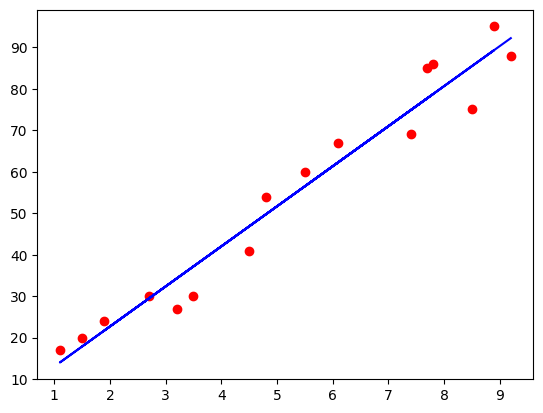

In [69]:
plt.scatter(x_train,y_train,color="red")
plt.plot(x_train,linreg.predict(x_train), color="blue")
plt.show()

# Regression Evaluation Metrics

In [70]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae = mean_absolute_error(y_test,ypred)
mse = mean_squared_error(y_test,ypred)

rmse = np.sqrt(mse)

r2 = r2_score(y_test,ypred)

print(f"MAE :- {mae}\nMSE:- {mse}\nRMSE:- {rmse}\nACCURACY:- {r2}")

MAE :- 4.564015037730867
MSE:- 24.074686364260987
RMSE:- 4.90659620962037
ACCURACY:- 0.9435488190277577


## Residue Plot

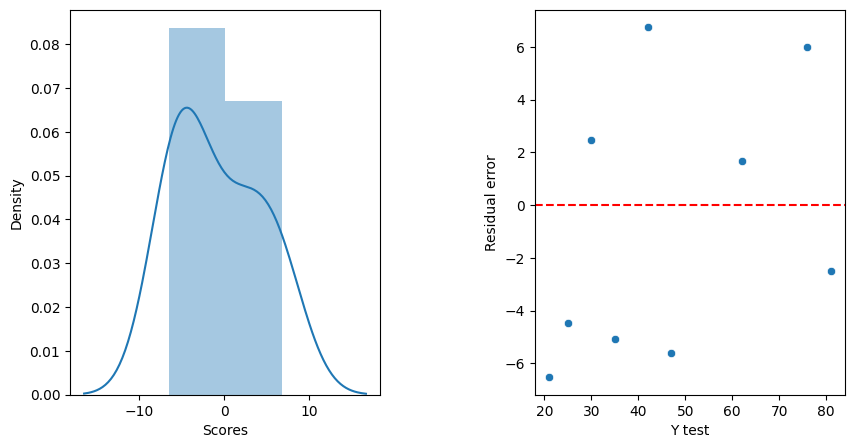

In [71]:
residue =y_test-ypred
fig, axes = plt.subplots( 1,2, figsize=(10,5))
sns.distplot(residue,ax=axes[0])
sns.scatterplot(x=y_test,y= residue,ax=axes[1])
plt.axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Y test')
axes[1].set_ylabel('Residual error')
fig.subplots_adjust(wspace=0.5)

## Checking Training and Testing Accuracy

In [78]:
train=linreg.score(x_train,y_train)
test=linreg.score(x_test,y_test)
print(f'Train:-{train}')
print(f'Test:-{test}')

Train:-0.9543348637719865
Test:-0.9435488190277577


In [81]:
newob = 9.5
yp = linreg.predict([[newob]])[0]
print(f"If you Study of {newob} hrs/day, You will Get Score Around {yp}% ")

If you Study of 9.5 hrs/day, You will Get Score Around 95.08279308555667% 


# The answer is around 95.08279308555667% 